#### Import libraries and packages

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.metrics import mean_squared_error
from sklearn.utils import column_or_1d
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


#### Import dataset

In [16]:
df = pd.read_csv("C:\\Users\\DNV\\OneDrive\\Desktop\\Data-Gold.csv",parse_dates=True,index_col=0)

#### Create a new Timestamp column for time series forecasting

In [17]:
df['Timestamp'] = pd.to_datetime(df.index).astype(np.int64) / 10**9
df_index = df.index
df_open = df['VND'].values.reshape(-1, 1)
df.head()

df

,VND,Timestamp
Date,,
2012-01-02,32202288.50,1.325462e+09
2012-01-03,33607538.00,1.325549e+09
2012-01-04,33923003.00,1.325635e+09
2012-01-05,33628569.00,1.325722e+09
2012-01-06,34000652.75,1.325808e+09
...,...,...
2022-12-26,41586906.00,1.672013e+09
2022-12-27,41894838.00,1.672099e+09
2022-12-28,41727084.00,1.672186e+09


#### Plotting Gold price chart

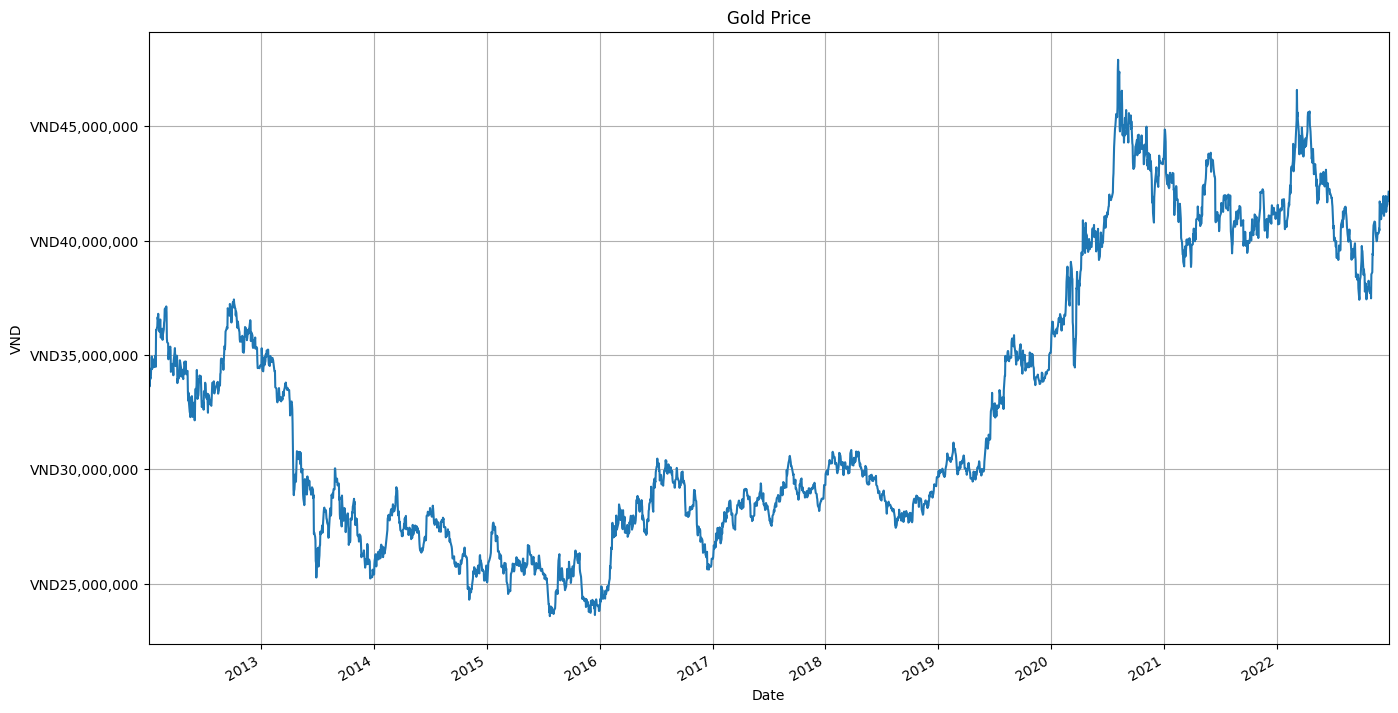

In [18]:
formatter = ticker.StrMethodFormatter('VND{x:,.0f}')

title = 'Gold Price'
ylabel = 'VND'
xlabel = 'Date'

ax = df['VND'].plot(figsize=(16, 9), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter)
ax.grid(True)

#### Normalizing / scaling data to facilitate model building

In [19]:
LR_sc = StandardScaler()

df_scaled = df.copy()
df_scaled['VND'] = LR_sc.fit_transform(df_open)
df_scaled

,VND,Timestamp
Date,,
2012-01-02,-0.062575,1.325462e+09
2012-01-03,0.167826,1.325549e+09
2012-01-04,0.219549,1.325635e+09
2012-01-05,0.171274,1.325722e+09
2012-01-06,0.232280,1.325808e+09
...,...,...
2022-12-26,1.476100,1.672013e+09
2022-12-27,1.526588,1.672099e+09
2022-12-28,1.499084,1.672186e+09


In [20]:
X_sc = StandardScaler()
y_sc = StandardScaler()

X = df.iloc[:, 1].values.reshape(-1, 1)
y = df.iloc[:, 0].values.reshape(-1, 1)


X_scaled = X_sc.fit_transform(X)
y_scaled = y_sc.fit_transform(y)


df_scaled = pd.DataFrame(index=df_index)
df_scaled['Timestamp'] = X_scaled
df_scaled['VND'] = y_scaled
df_scaled.head()

,Timestamp,VND
Date,,
2012-01-02,-1.730686,-0.062575
2012-01-03,-1.729824,0.167826
2012-01-04,-1.728962,0.219549
2012-01-05,-1.728100,0.171274
2012-01-06,-1.727237,0.232280


#### Split data for training and testing ( 7-3 )

In [21]:
interrupt = int(len(df_scaled) * .7)

train_data, test_data = df_scaled[:interrupt], df_scaled[interrupt:]
index_test = df_scaled.index[interrupt:]
print(train_data.shape)
print(test_data.shape)

(2008, 2)
(862, 2)


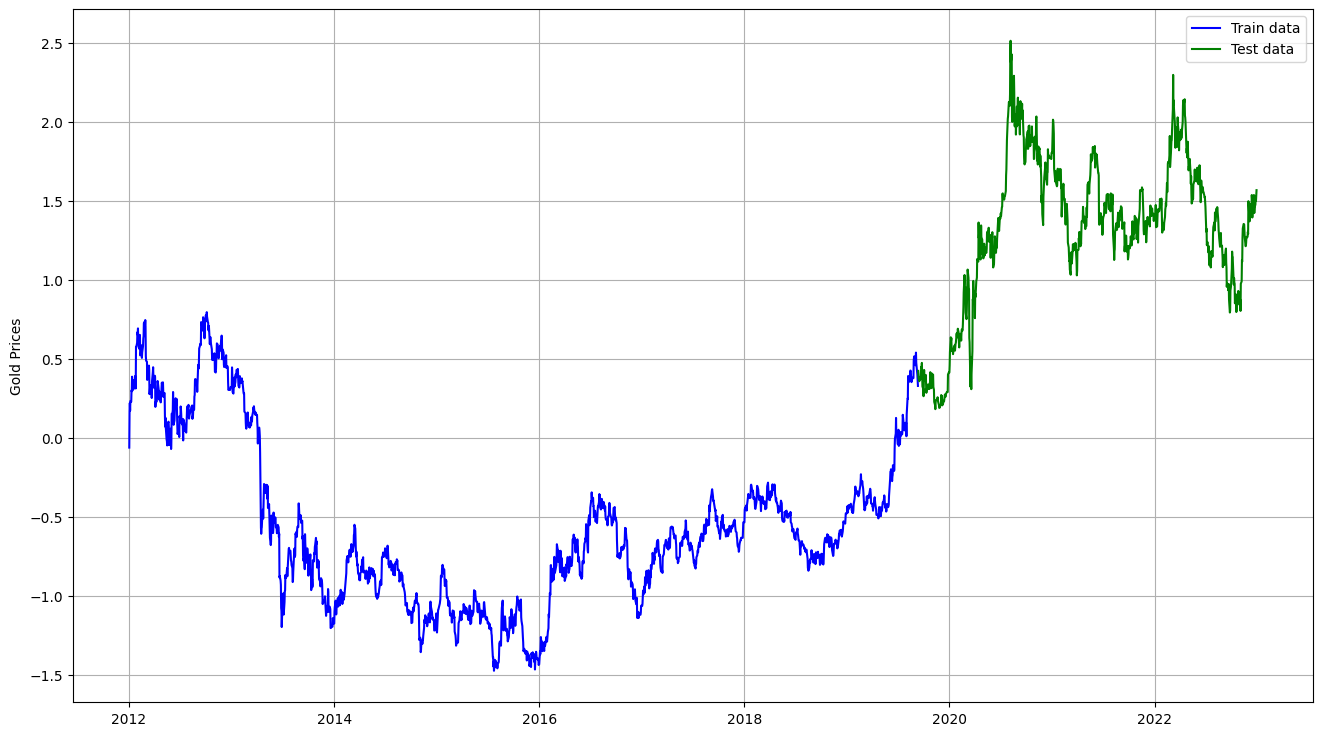

In [22]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.ylabel('Gold Prices')
plt.plot(train_data['VND'], 'blue', label='Train data')
plt.plot(test_data['VND'], 'green', label='Test data')
plt.legend()

#### Determine the independent variable (X) and the dependent variable (y)

In [23]:
X_train = train_data['Timestamp'].values.reshape(-1, 1)
y_train = train_data['VND'].values.reshape(-1, 1)

X_test = test_data['Timestamp'].values.reshape(-1, 1)
y_test = test_data['VND'].values.reshape(-1, 1)

#### Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_train,y_train)
pred = LR_model.predict(X_test)
pred

array([[-0.7721452 ],
       [-0.77229216],
       [-0.77273302],
       [-0.77287998],
       [-0.77302693],
       [-0.77317389],
       [-0.77332085],
       [-0.77376171],
       [-0.77390867],
       [-0.77405562],
       [-0.77420258],
       [-0.77434953],
       [-0.7747904 ],
       [-0.77493735],
       [-0.77508431],
       [-0.77523126],
       [-0.77537822],
       [-0.77581908],
       [-0.77596604],
       [-0.776113  ],
       [-0.77625995],
       [-0.77640691],
       [-0.77684777],
       [-0.77699473],
       [-0.77714168],
       [-0.77728864],
       [-0.77743559],
       [-0.77787646],
       [-0.77802341],
       [-0.77817037],
       [-0.77831732],
       [-0.77846428],
       [-0.77890515],
       [-0.7790521 ],
       [-0.77919906],
       [-0.77934601],
       [-0.77949297],
       [-0.77993383],
       [-0.78008079],
       [-0.78022774],
       [-0.7803747 ],
       [-0.78052165],
       [-0.78096252],
       [-0.78110947],
       [-0.78125643],
       [-0

#### Transform back to original form

In [25]:
inv_pred = y_sc.inverse_transform(pred.reshape(-1, 1))
inv_test = y_sc.inverse_transform(y_test.reshape(-1, 1))


#### Graph the test set and the prediction results

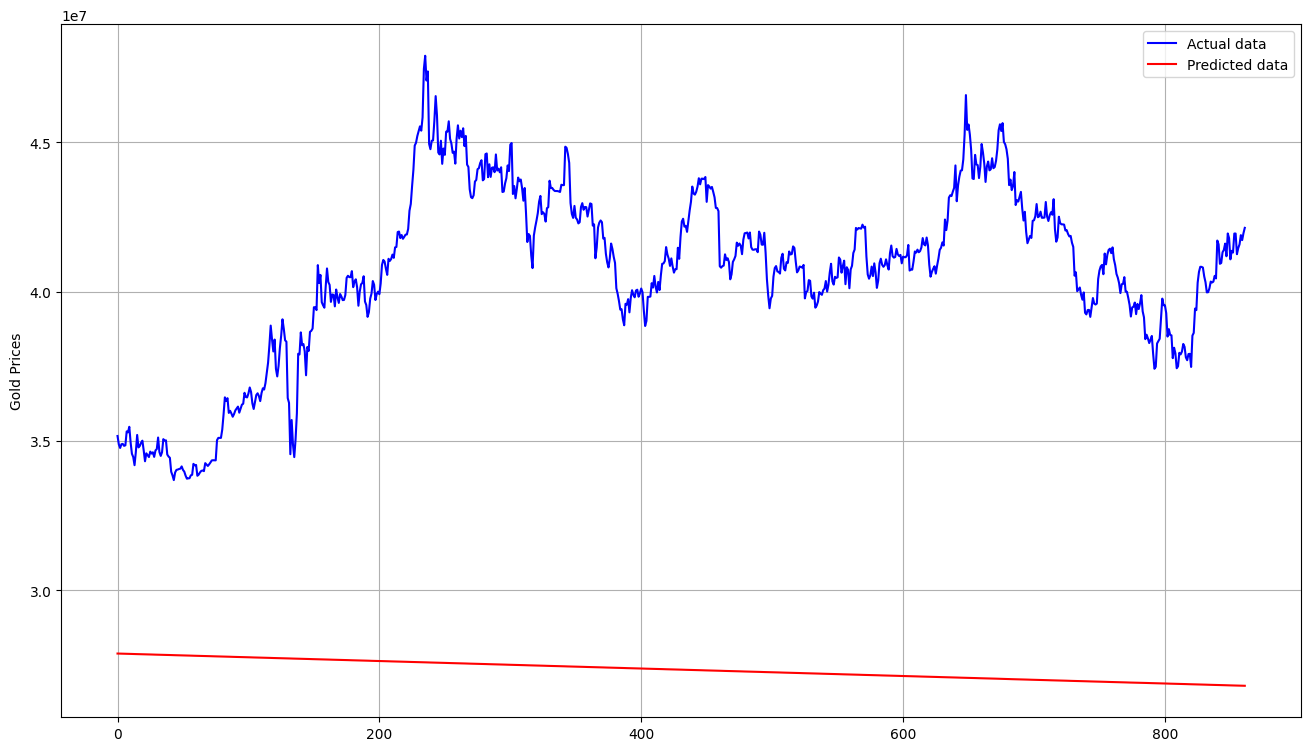

In [26]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.ylabel('Gold Prices')
plt.plot(column_or_1d(inv_test), 'blue', label='Actual data')
plt.plot(column_or_1d(inv_pred), 'red', label='Predicted data')
plt.legend()

#### Model Evaluation

In [27]:
from sklearn.metrics import r2_score
mae = mean_absolute_error(inv_test, inv_pred) 
mape = mean_absolute_percentage_error(inv_test, inv_pred)
mse = mean_squared_error(inv_test, inv_pred)
rmse = np.sqrt(mse) 
r2 = r2_score(inv_test, inv_pred)
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape*100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 13285218.02
MAPE: 32.31%
MSE: 185890688212178.62
RMSE: 13634173.54
R2: -20.69


In [28]:
df_pred = pd.DataFrame(columns=['Actual', 'Pred', 'Error'], index=index_test)
df_pred['Actual'] = column_or_1d(inv_test)
df_pred['Pred'] = column_or_1d(inv_pred)
df_pred['Error'] = df_pred['Actual'] - df_pred['Pred']
df_pred

,Actual,Pred,Error
Date,,,
2019-09-12,35164002.87,2.787451e+07,7.289495e+06
2019-09-13,34883189.85,2.787361e+07,7.009578e+06
2019-09-16,34763485.67,2.787092e+07,6.892563e+06
2019-09-17,34888522.25,2.787003e+07,7.018496e+06
2019-09-18,34898490.25,2.786913e+07,7.029360e+06
...,...,...,...
2022-12-26,41586906.00,2.679805e+07,1.478886e+07
2022-12-27,41894838.00,2.679715e+07,1.509769e+07
2022-12-28,41727084.00,2.679626e+07,1.493083e+07
